- Display the first 5 records

In [3]:
import pandas as pd 

df = pd.read_csv("../data/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


- Display only the first 3 of following columns: 
    - id
    - neighbourhood_group
    - neighbourhood
    - room_type
    - price

In [25]:
df2 = df[["id", "neighbourhood_group", "neighbourhood", "room_type", "price"]]
df2.head(3)

,id,neighbourhood_group,neighbourhood,room_type,price
0,2539,Brooklyn,Kensington,Private room,149
1,2595,Manhattan,Midtown,Entire home/apt,225
2,3647,Manhattan,Harlem,Private room,150


- Display the listing with in descending order based on highest price. 

In [26]:
df2.sort_values("price", ascending=False)

,id,neighbourhood_group,neighbourhood,room_type,price
9151,7003697,Queens,Astoria,Private room,10000
17692,13894339,Brooklyn,Greenpoint,Entire home/apt,10000
29238,22436899,Manhattan,Upper West Side,Entire home/apt,10000
40433,31340283,Manhattan,Lower East Side,Entire home/apt,9999
12342,9528920,Manhattan,Lower East Side,Private room,9999
...,...,...,...,...,...
25778,20624541,Brooklyn,Williamsburg,Entire home/apt,0
25796,20639914,Brooklyn,Bedford-Stuyvesant,Private room,0
25433,20333471,Bronx,East Morrisania,Private room,0
26841,21291569,Brooklyn,Bushwick,Shared room,0


- Display the missing entries

In [29]:
df2[df2.isna()]

,id,neighbourhood_group,neighbourhood,room_type,price
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
48890,NaN,NaN,NaN,NaN,NaN
48891,NaN,NaN,NaN,NaN,NaN
48892,NaN,NaN,NaN,NaN,NaN
48893,NaN,NaN,NaN,NaN,NaN


- Fill out the missing values with 0. 

In [30]:
df2 = df2.fillna(0)
df2

,id,neighbourhood_group,neighbourhood,room_type,price
0,2539,Brooklyn,Kensington,Private room,149
1,2595,Manhattan,Midtown,Entire home/apt,225
2,3647,Manhattan,Harlem,Private room,150
3,3831,Brooklyn,Clinton Hill,Entire home/apt,89
4,5022,Manhattan,East Harlem,Entire home/apt,80
...,...,...,...,...,...
48890,36484665,Brooklyn,Bedford-Stuyvesant,Private room,70
48891,36485057,Brooklyn,Bushwick,Private room,40
48892,36485431,Manhattan,Harlem,Entire home/apt,115
48893,36485609,Manhattan,Hell's Kitchen,Shared room,55


- Calculate the average price of the listings

In [31]:
df["price"].mean()

152.7206871868289

- Only display the listings in Hell's Kitchen neighborhood

In [35]:
hells_kitchen_df = df2[df2["neighbourhood"] == "Hell's Kitchen"]
hells_kitchen_df

,id,neighbourhood_group,neighbourhood,room_type,price
7,5178,Manhattan,Hell's Kitchen,Private room,79
11,5441,Manhattan,Hell's Kitchen,Private room,85
27,9357,Manhattan,Hell's Kitchen,Entire home/apt,150
57,15220,Manhattan,Hell's Kitchen,Private room,69
65,16421,Manhattan,Hell's Kitchen,Private room,52
...,...,...,...,...,...
48803,36441808,Manhattan,Hell's Kitchen,Entire home/apt,145
48872,36476675,Manhattan,Hell's Kitchen,Entire home/apt,260
48888,36484087,Manhattan,Hell's Kitchen,Private room,125
48893,36485609,Manhattan,Hell's Kitchen,Shared room,55


In [36]:
hells_kitchen_df.groupby(["room_type"]).count()

,id,neighbourhood_group,neighbourhood,price
room_type,,,,
Entire home/apt,1187,1187,1187,1187
Private room,672,672,672,672
Shared room,99,99,99,99


In [38]:
hells_kitchen_df.groupby(["room_type"]).count().sort_values("room_type", ascending=False)

,id,neighbourhood_group,neighbourhood,price
room_type,,,,
Shared room,99,99,99,99
Private room,672,672,672,672
Entire home/apt,1187,1187,1187,1187


<AxesSubplot:xlabel='room_type'>

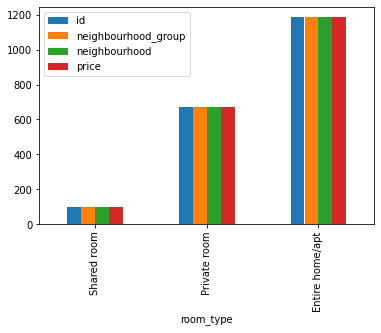

In [43]:
hells_kitchen_df.groupby(["room_type"]).count().sort_values("room_type", ascending=False).plot(kind="bar")